In [1]:
vis_times = {'48': 0.09249544143676758, '36': 0.06562995910644531, '102': 0.1576690673828125, '120': 0.18156147003173828, '6': 0.02209925651550293, '45': 0.07656621932983398, '49': 0.12847566604614258, '111': 0.16900300979614258, '60': 0.09693193435668945, '52': 0.08573722839355469, '119': 0.1797335147857666, '94': 0.20066142082214355, '97': 0.14989972114562988, '62': 0.10012006759643555, '19': 0.041055917739868164, '84': 0.13042259216308594, '4': 0.01871037483215332, '56': 0.09217643737792969, '91': 0.20968270301818848, '112': 0.16828274726867676, '113': 0.17054200172424316, '118': 0.1787254810333252, '74': 0.11600804328918457, '16': 0.03568863868713379, '17': 0.1187138557434082, '34': 0.06155729293823242, '43': 0.0748908519744873, '12': 0.030333518981933594, '92': 0.14292216300964355, '87': 0.13624334335327148, '114': 0.1721937656402588, '33': 0.06000566482543945, '108': 0.16353249549865723, '46': 0.17358613014221191, '124': 0.18544697761535645, '65': 0.10316348075866699, '67': 0.10605239868164062, '71': 0.1130523681640625, '40': 0.06974911689758301, '51': 0.08554649353027344, '76': 0.11917233467102051, '85': 0.13245868682861328, '9': 0.1383056640625, '77': 0.1206817626953125, '63': 0.10081219673156738, '14': 0.03365516662597656, '75': 0.11991167068481445, '96': 0.14778399467468262, '38': 0.06677937507629395, '64': 0.10311603546142578, '89': 0.13719868659973145, '30': 0.05529427528381348, '22': 0.045339107513427734, '10': 0.027773141860961914, '88': 0.13662958145141602, '8': 0.024298667907714844, '26': 0.18311572074890137, '20': 0.04124855995178223, '105': 0.16247034072875977, '47': 0.08150029182434082, '79': 0.12667036056518555, '110': 0.16859173774719238, '59': 0.09619355201721191, '25': 0.048430681228637695, '53': 0.08784985542297363, '95': 0.147843599319458, '117': 0.17932534217834473, '7': 0.023517370223999023, '13': 0.03343844413757324, '21': 0.04477810859680176, '99': 0.15348291397094727, '106': 0.1637287139892578, '123': 0.18816828727722168, '24': 0.047772884368896484, '80': 0.12755584716796875, '116': 0.17669034004211426, '41': 0.07117104530334473, '27': 0.052156686782836914, '100': 0.15681123733520508, '57': 0.09399771690368652, '37': 0.06644415855407715, '109': 0.1675395965576172, '103': 0.16031241416931152, '66': 0.10691404342651367, '115': 0.36046361923217773, '90': 0.13837194442749023, '58': 0.09440064430236816, '73': 0.11498188972473145, '23': 0.04578804969787598, '93': 0.1424877643585205, '70': 0.10997605323791504, '31': 0.05685687065124512, '55': 0.09257388114929199, '54': 0.08880782127380371, '18': 0.03943204879760742, '11': 0.028827667236328125, '29': 0.05381274223327637, '35': 0.06257796287536621, '42': 0.07144522666931152, '28': 0.05240440368652344, '50': 0.08381128311157227, '83': 0.12952184677124023, '5': 0.020148038864135742, '15': 0.034725189208984375, '39': 0.06925129890441895, '101': 0.15560340881347656, '69': 0.10942745208740234, '86': 0.1398463249206543, '121': 0.18940019607543945, '107': 0.16586041450500488, '61': 0.09722661972045898, '78': 0.12810015678405762, '44': 0.07671046257019043, '104': 0.17494964599609375, '98': 0.15760517120361328, '68': 0.11460351943969727, '82': 0.1338944435119629, '81': 0.13196039199829102, '32': 0.06348085403442383, '72': 0.11973214149475098}

In [2]:
from os import chdir
from transformers import AutoModel, AutoImageProcessor
model = AutoModel.from_pretrained("../../models/logical_pt")
processor = AutoImageProcessor.from_pretrained("microsoft/swinv2-large-patch4-window12to16-192to256-22kto1k-ft")
from PIL import Image
import torch
import torch.nn.functional as F

DIR = "../../data/retrieval_scaling/queries"

def embedd(path):
    image = Image.open(path).convert("RGB")
    inputs = processor(image, return_tensors="pt")
    outputs = model(**inputs)
    return outputs.pooler_output


base_embedding = embedd(f"{DIR}/20.png")


/home/kilian/.cache/pypoetry/virtualenvs/evaluate-cbr-Epwt-pU6-py3.10/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [3]:
from glob import glob
from time import time
from tqdm import tqdm
embedd_times = {}
sim_times = {}

files = glob(f"{DIR}/*.png")
for file in tqdm(files):
    t0 = time()
    number = file.split("/")[-1].split(".")[0]
    embedding = embedd(file)
    embedd_times[number] = time() - t0
    t0 = time()
    cos = F.cosine_similarity(base_embedding, embedding, dim=-1)
    sim_times[number] = time() - t0

100%|██████████| 120/120 [01:02<00:00,  1.92it/s]


In [4]:
sizes = [int(file.split("/")[-1].split(".")[0]) for file in files]
sizes.sort()

In [5]:
# A* results
res = """
4,705
7,254
17,739
11,611
16,660
15,673
319,389
34,860
152,421
34,454
72,905
99,875
70,052
156,583
92,982
109,439
"""
astar_times = {}
astar = res.replace(",", ".").split()
for i in range(len(sizes[:16])):
    astar_times[sizes[i]] = float(astar[i])
# new times from arguelauncer/combine_data.ipynb
astar_times = astar_times | {21: 583.1426552820485, 22: 352.93988140299916, 23: 1968.3755269719986, 24: 138.96564826904796, 25: 830.2504579459783, 26: 1694.2849450740032, 27: 4470.0782571970485, 28: 322.59936724603176, 29: 1734.4804777950048, 30: 3694.885228915955, 31: 1077.4939379290445, 32: 1204.0192908509634, 33: 1356.791274649091, 34: 867.9759116229834, 35: 1316.3642489089398, 36: 5012.9396054690005, 37: 1611.4490906269057, 38: 787.6964099609759, 39: 734.5470939190127, 40: 4348.625474424916, 41: 2023.781593258027, 42: 1802.351480958052, 43: 2550.355987926945, 44: 3322.069814487011, 45: 7573.2170934820315, 46: 14081.520188921946, 47: 8117.291840499034, 48: 5790.964227367076, 49: 10254.180509043974, 50: 4755.55852430989, 51: 2717.719237916055, 52: 2300.7716033729957, 53: 4023.5037187340204, 54: 6304.664951022016, 55: 5796.458030981012, 56: 4100.9764139580075, 57: 2292.7294746659463}

In [6]:
astar_times.keys()

dict_keys([4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57])

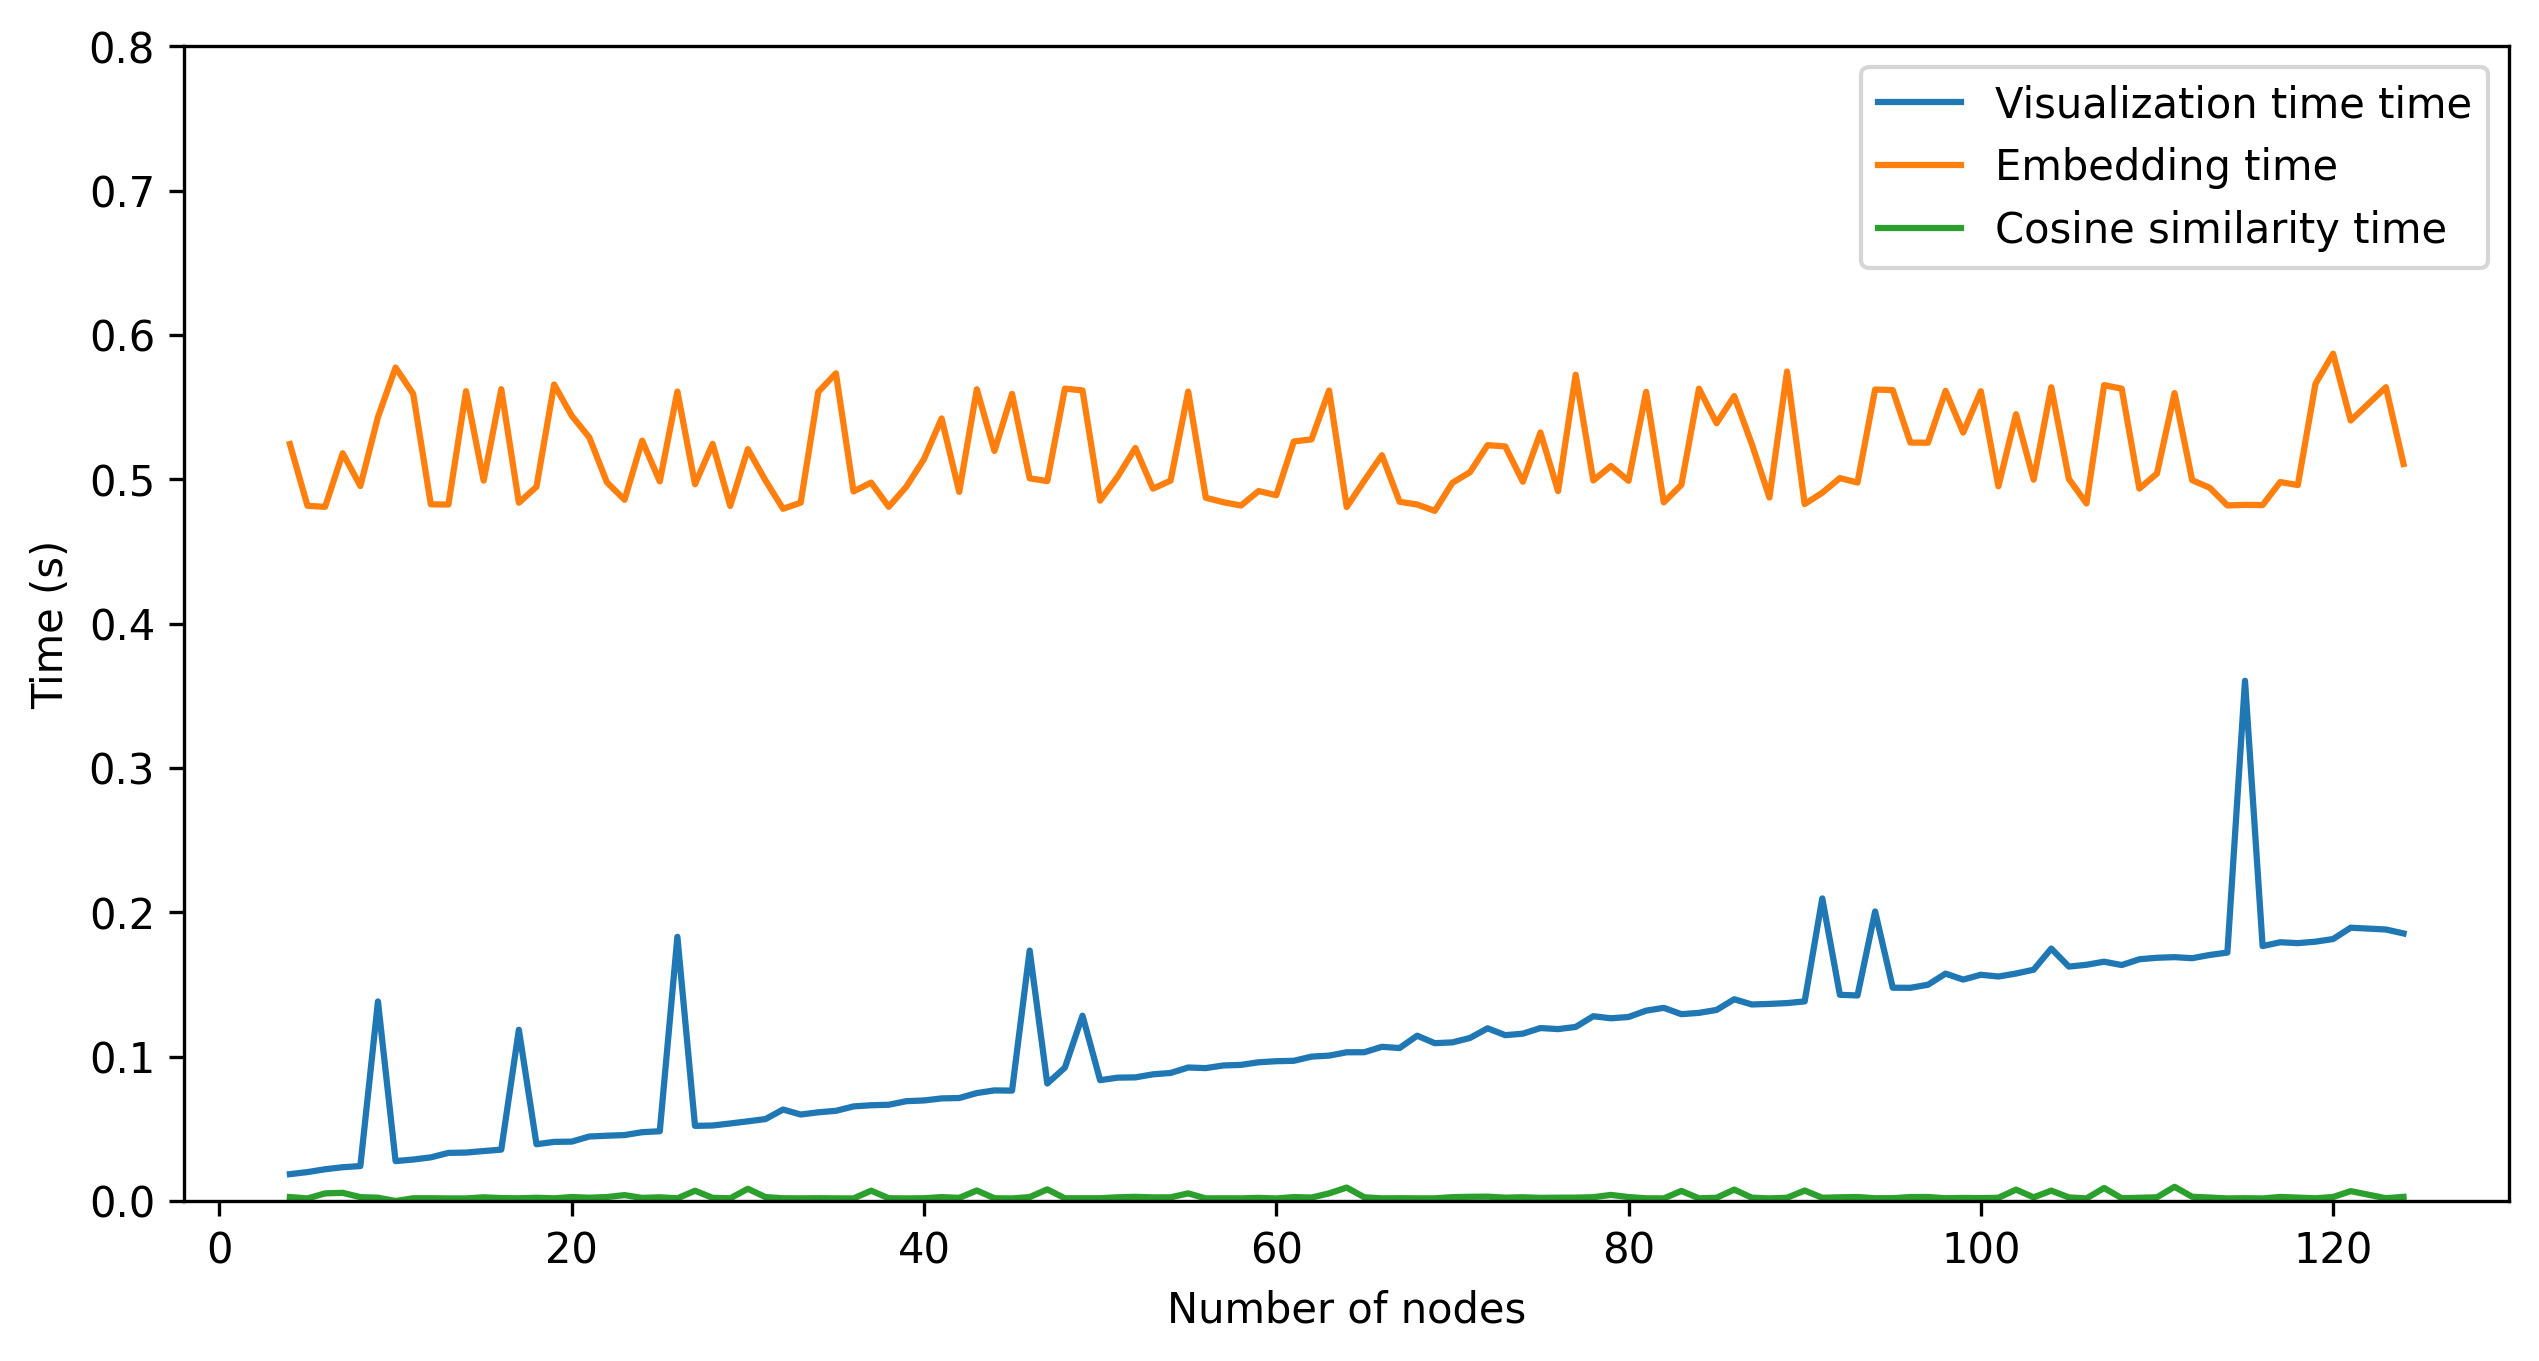

In [10]:
# plot embedding_times and times
import matplotlib.pyplot as plt
import numpy as np

total_time = []
a = []
b = []
c = []
d = []
astar_sizes = []
for size in sizes:
    a.append(vis_times[str(size)])
    b.append(embedd_times[str(size)])
    c.append(sim_times[str(size)])
    total_time.append(vis_times[str(size)] + embedd_times[str(size)] + sim_times[str(size)])
    if (size in astar_times.keys()):
        d.append(astar_times[size])
        astar_sizes.append(size)

plt.figure(figsize=(10, 5), dpi=300)
plt.plot(sizes, a, label="Visualization time time")
plt.plot(sizes, b, label="Embedding time")
plt.plot(sizes, c, label="Cosine similarity time")
plt.xlabel("Number of nodes")
plt.ylabel("Time (s)")
plt.ylim(0, 0.8)
plt.legend(loc="upper right")

plt.show()

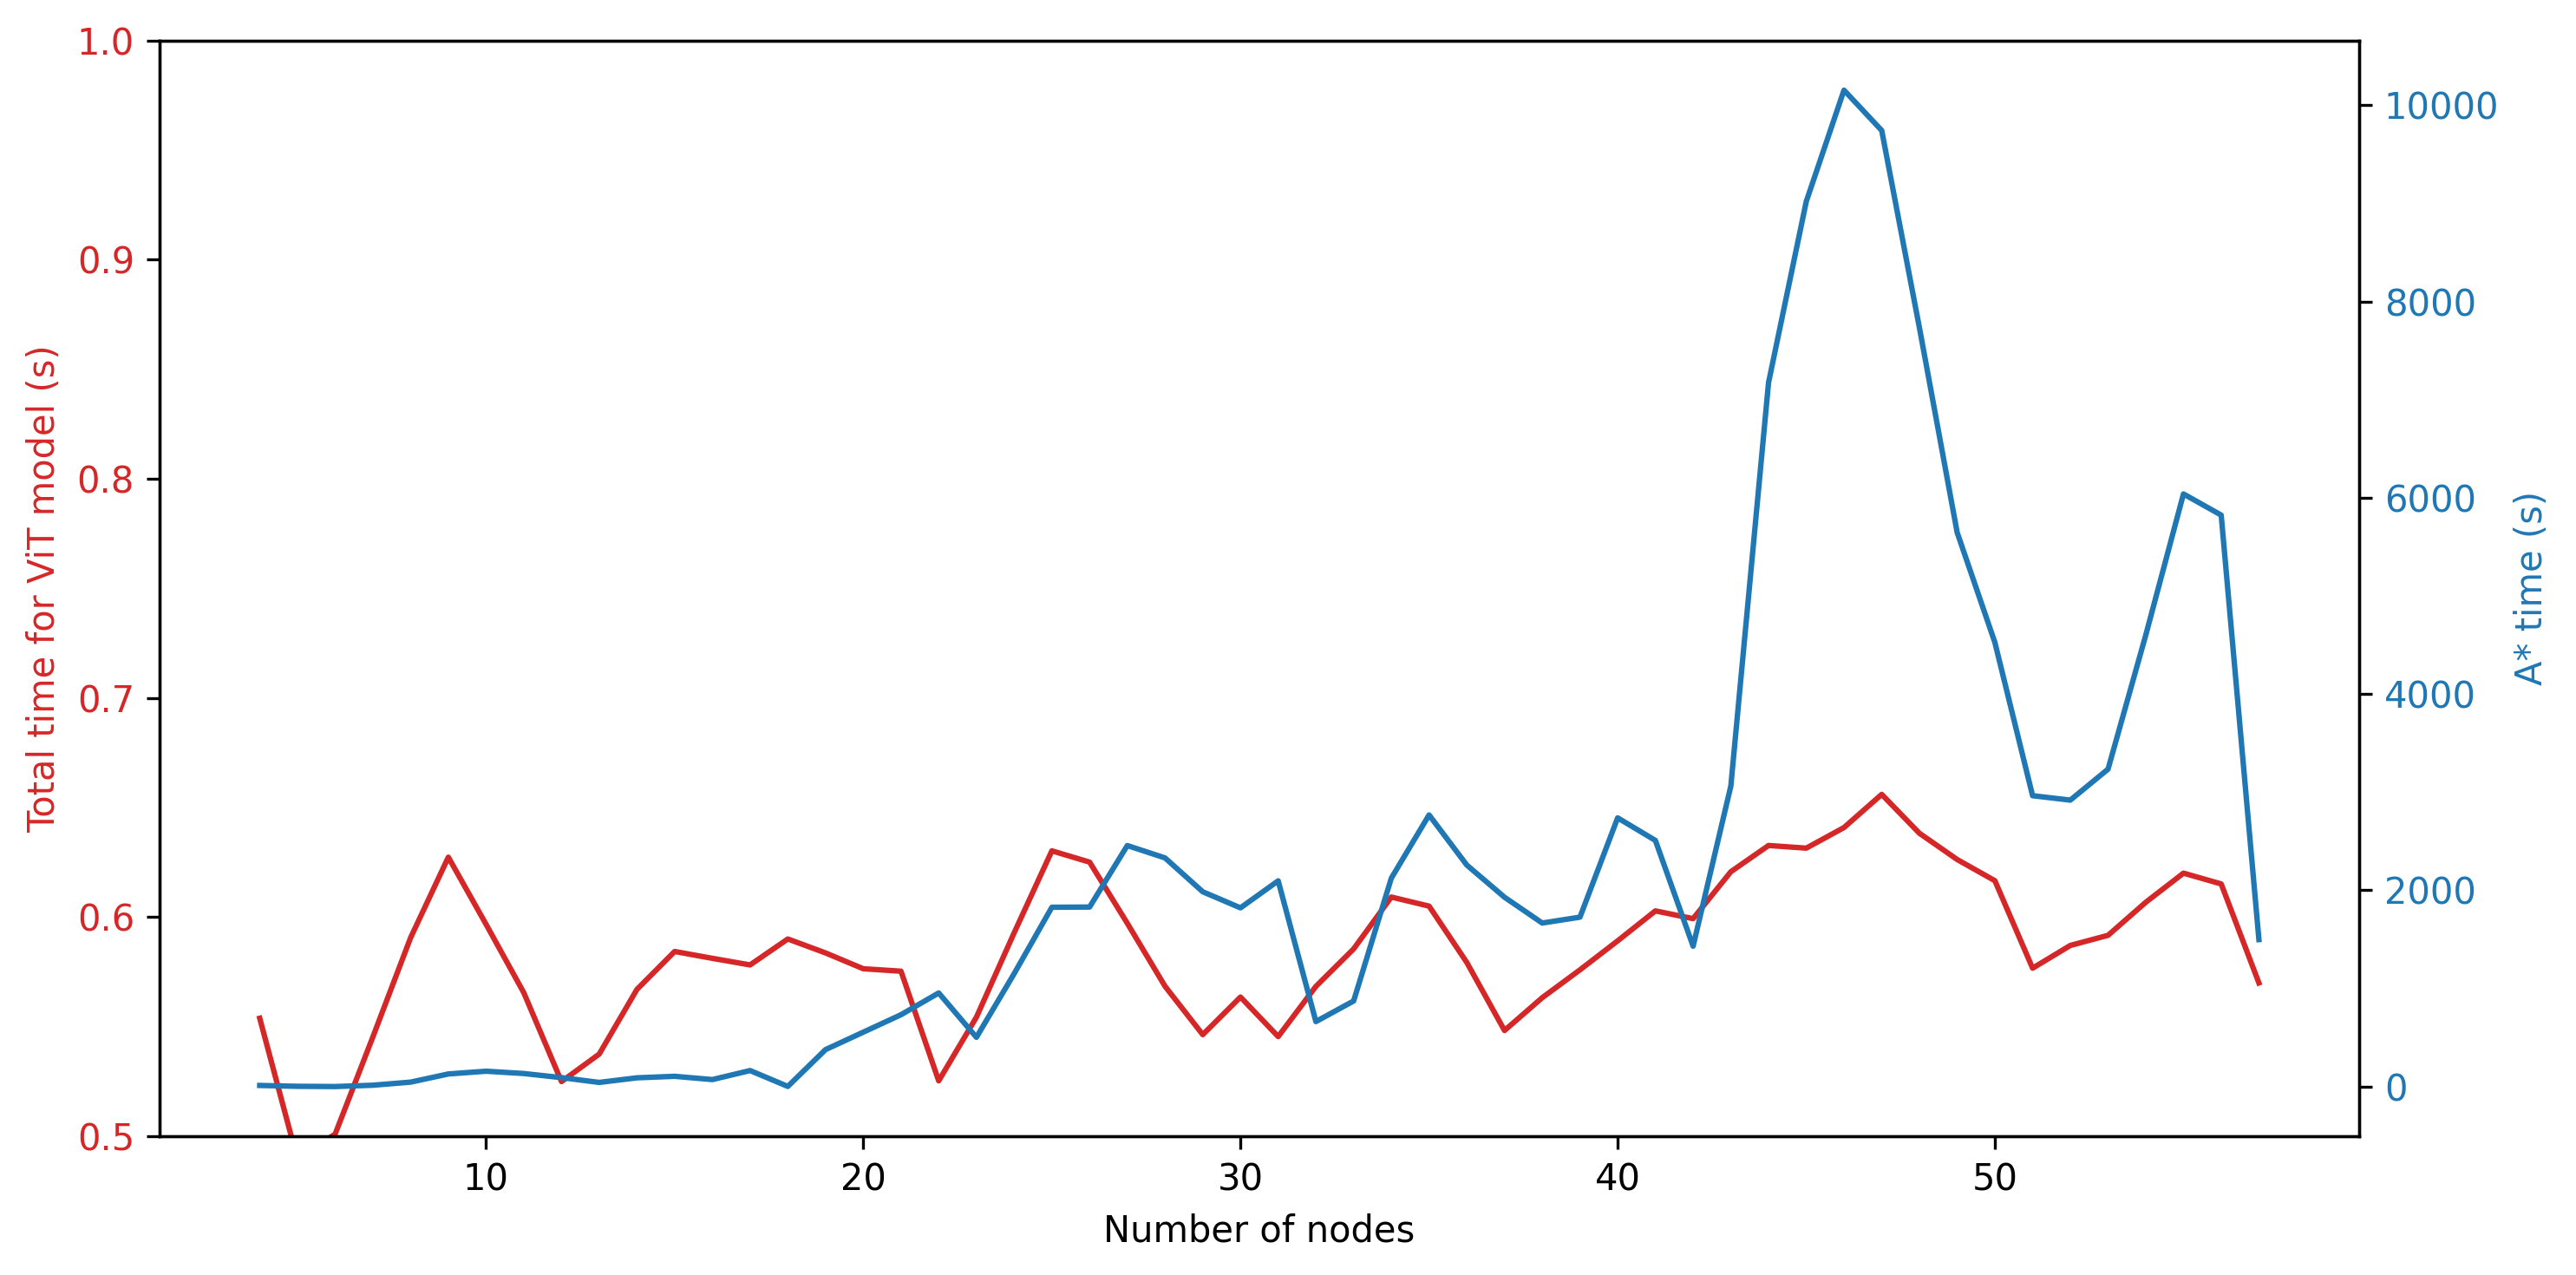

In [8]:
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

fig, ax1 = plt.subplots(figsize=(10, 5), dpi=300)
color = "tab:red"
ax1.set_xlabel("Number of nodes")
ax1.set_ylabel("Total time for ViT model (s)", color=color)
ax1.plot(sizes[:54], savgol_filter(total_time[:54], 10, 4), color=color)
ax1.tick_params(axis="y", labelcolor=color)
ax1.set_ylim(0.5, 1)  # Set y-axis limits from 0 to 2 seconds

ax2 = ax1.twinx()
# plt.ylim(0, .25)  # Set y-axis limits from 0 to 2 seconds
color = "tab:blue"
ax2.set_ylabel("A* time (s)", color=color)
ax2.plot(astar_sizes, savgol_filter(d, 10, 4), label="A* time")
ax2.tick_params(axis="y", labelcolor=color)
fig.tight_layout()
plt.show()

In [9]:
list(zip(sizes, total_time))

[(4, 0.5459144115447998),
 (5, 0.5036971569061279),
 (6, 0.5084304809570312),
 (7, 0.5473237037658691),
 (8, 0.5224218368530273),
 (9, 0.6837866306304932),
 (10, 0.605313777923584),
 (11, 0.5900402069091797),
 (12, 0.5150246620178223),
 (13, 0.517845869064331),
 (14, 0.5965850353240967),
 (15, 0.5364656448364258),
 (16, 0.6001946926116943),
 (17, 0.6044867038726807),
 (18, 0.5366499423980713),
 (19, 0.6086947917938232),
 (20, 0.5881445407867432),
 (21, 0.5761384963989258),
 (22, 0.5460875034332275),
 (23, 0.5357985496520996),
 (24, 0.5768156051635742),
 (25, 0.5496368408203125),
 (26, 0.7458434104919434),
 (27, 0.5559766292572021),
 (28, 0.5792286396026611),
 (29, 0.537358283996582),
 (30, 0.5847408771514893),
 (31, 0.558896541595459),
 (32, 0.5450856685638428),
 (33, 0.545710563659668),
 (34, 0.6241323947906494),
 (35, 0.6379132270812988),
 (36, 0.5591416358947754),
 (37, 0.5714218616485596),
 (38, 0.5497608184814453),
 (39, 0.5660727024078369),
 (40, 0.58575439453125),
 (41, 0.616115